In [16]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# 输入实验数据，无阻尼数据，f——频率（Hz），U——电压（V）
f1 = np.array([258.306, 258.946, 259.406, 260.046, 260.156, 260.186, 260.206, 260.226, 260.246, 260.256, 260.276, 260.311,
               260.341, 260.371, 260.401, 260.441, 260.471, 260.521, 260.581, 260.681, 261.381, 261.681, 262.381])
U1 = np.array([0.068, 0.085, 0.111, 0.291, 0.455, 0.550, 0.634, 0.750, 0.918, 1.044, 1.314, 1.524,
               1.350, 1.066, 0.815, 0.594, 0.480, 0.356, 0.268, 0.182, 0.030, 0.024, 0.012])
# 有阻尼数据 
f2 = np.array([258.132, 258.632, 259.132, 259.332, 259.632, 259.832, 259.932, 260.032, 260.072, 260.102, 260.112,
               260.132, 260.152, 260.222, 260.272, 260.322, 260.372, 260.672, 261.072, 261.572, 262.072])

U2 = np.array([0.069, 0.078, 0.103, 0.125, 0.169, 0.254, 0.354, 0.604, 0.867, 1.176, 1.251,
               1.337, 1.264, 0.757, 0.521, 0.387, 0.298, 0.108, 0.047, 0.022, 0.014])

# 对数据进行平滑处理，不然matplot画出来的图是折线的（这里取了10000个点，取这么多是为了保证能找到半功率点，你可以自己改）
xnew1 = np.linspace(f1.min(), f1.max(), 10000)
U1_smooth = interp1d(f1, U1, kind='quadratic')(xnew1)

xnew2 = np.linspace(f2.min(), f2.max(), 10000)
U2_smooth = interp1d(f2, U2, kind='quadratic')(xnew2)


# 找出半功率点 0.707Umax, 可以保证U的小数点前两位准确，第三位会变
U1_max = U1_smooth.max()
U1_index = np.where((U1_smooth>=0.7055*U1_max)&(U1_smooth<=0.7085*U1_max))  # 通过改U1_max前的系数可改变精度，但可能需要提高取的点数，下同
print(xnew1[U1_index]) # 半功率点频率
print(U1_smooth[U1_index])  # 所取得半功率点电压

U2_max = U2_smooth.max()
U2_index = np.where((U2_smooth>=0.7055*U2_max)&(U2_smooth<=0.7085*U2_max))
print(xnew2[U2_index])
print(U2_smooth[U2_index])

# 计算锐度Q（即品质因数）
f1_res = xnew1[np.where(U1_smooth==U1_max)]  # 共振频率，下同
Q1 = f1_res / (xnew1[U1_index[0][1]]-xnew1[U1_index[0][0]])
print(Q1)

f2_res = xnew1[np.where(U2_smooth==U2_max)]  # 共振频率
Q2 = f2_res / (xnew2[U2_index[0][1]]-xnew2[U2_index[0][0]])
print(Q2)

[260.25852775 260.36978638]
[1.07826819 1.07730177]
[260.07973677 260.19558436]
[0.9437068  0.94533437]
[2339.67533563]
[2247.56592855]


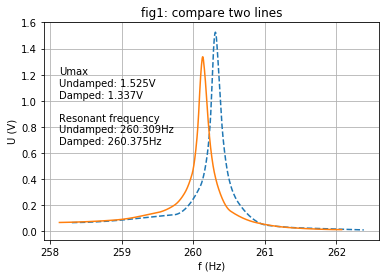

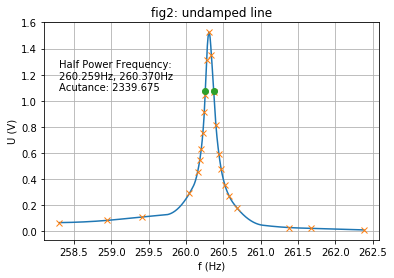

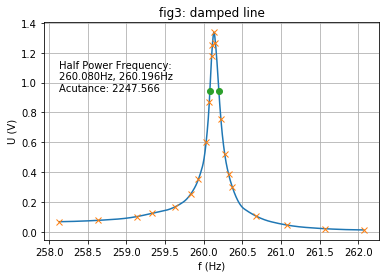

In [17]:
# 先在一张图里对比两种数据
fig, ax = plt.subplots()
ax.plot(xnew1, U1_smooth, '--', xnew2, U2_smooth, '-')
ax.set(xlabel='f (Hz)', ylabel='U (V)', title='fig1: compare two lines')  
ax.annotate('Umax\nUndamped: {:.3f}V\nDamped: {:.3f}V\n\nResonant frequency\nUndamped: {:.3f}Hz\nDamped: {:.3f}Hz'.format(U1_max, U2_max, f1_res[0], f2_res[0]), xy=(xnew2[0], U2_max/2))
ax.grid()

# 单独分析，无阻尼
fig1, ax1 = plt.subplots()
ax1.plot(xnew1, U1_smooth, f1, U1, 'x', xnew1[U1_index], U1_smooth[U1_index], 'o')
ax1.set(xlabel='f (Hz)', ylabel='U (V)', title='fig2: undamped line')
ax1.annotate('Half Power Frequency:\n{:.3f}Hz, {:.3f}Hz\nAcutance: {:.3f}'.format(xnew1[U1_index[0][0]], xnew1[U1_index[0][-1]], Q1[0]), xy=(xnew1[0], U1_smooth[U1_index[0][0]]))
ax1.grid()

# 有阻尼
fig2, ax2 = plt.subplots()
ax2.plot(xnew2, U2_smooth, f2, U2, 'x', xnew2[U2_index], U2_smooth[U2_index], 'o')
ax2.set(xlabel='f (Hz)', ylabel='U (V)', title='fig3: damped line')
ax2.annotate('Half Power Frequency:\n{:.3f}Hz, {:.3f}Hz\nAcutance: {:.3f}'.format(xnew2[U2_index[0][0]], xnew2[U2_index[0][-1]], Q2[0]), xy=(xnew2[0], U2_smooth[U2_index[0][0]]))
ax2.grid()

# 显示并保存图片
plt.show()
fig.savefig('compare.png')
fig1.savefig('undamped.png')
fig2.savefig('damped.png')

0.5075069216219136 14.637103802124848


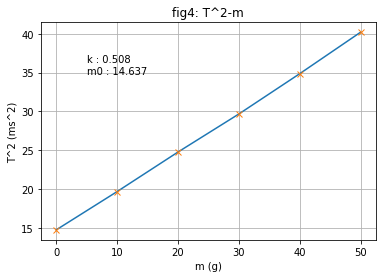

In [18]:
# 共振频率（f）与音叉所加质量（m）关系图
# 严格来说应该用最小二乘法来绘图，但老师也说了这个实验精度能达到很高，所以我的点好像都在线上，就不麻烦了。
m = np.array([0, 10, 20, 30, 40, 50])  # 质量m(g)
f = np.array([260.311, 225.381, 200.911, 183.581, 169.371, 157.721])  # 共振频率f(Hz)

# 处理数据
T = 1000 / f  # 将频率（Hz）转换为周期（ms），
T2 = T ** 2  # 求T的平方

# 用最小二乘法计算k和m0
k = ((m - m.mean()) * (T2 - T2.mean())).sum() / (m.var() * m.size)
m0 = T2.mean() - k * m.mean()
print(k, m0)

# 坐标图参数设置
fig3, ax3 = plt.subplots()
ax3.plot(m, T2, m, T2, 'x')
ax3.set(xlabel='m (g)', ylabel='T^2 (ms^2)', title='fig4: T^2-m')
ax3.annotate('k : {:.3f}\nm0 : {:.3f}'.format(k, m0), xy=(m[0]+5, T2[-2]))
ax3.grid()

# 显示并保存图片
plt.show()
fig3.savefig('T^2-m关系图')
